# Introduction

In this project, I analyze a dataset of Spotify songs to understand what makes some songs more popular than others and this is also based on my similar project from R but covering more. The dataset (`train.csv`) i got from kaggle contains several audio features but i chose these for my testing:

- danceability – how easy it is to dance to a song
- energy – the intensity and activity level of a song
- valence – how positive or negative a song makes one feel
- tempo – beats per minute (BPM)
- popularity – a score between 0 and 100 measuring Spotify song popularity

- I categorized all songs into Low, Medium, or High popularity levels by adding restrictions where popularity < 17 is known as "Low", popularity > 50 is known as "High", and in between is default to "Medium"). Then, I grouped the songs by their popularity level to analyze the average of each audio description.

- I added a distribution histogram to visualize the distribution of popularity in the amount of songs their was is this data set. This shows us how common different popularity scores are, and see how easy and hard it is for popular songs to exist.

- I also added another bar graph for the top 10% of songs to compare them with the rest of the dataset. Since the audio descriptions have diffent values i had to seperate the tempo grpah form the other but you can well the differnce. 


In [43]:
#needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:

spotifyMusicData = pd.read_csv("/Users/kevinolvera/Downloads/train.csv")

spotifyMusicData.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [45]:
# Define popularity level using np.select
##only high populairty songs in the new data set therefore create object only

conditions = [
    (spotifyMusicData['popularity'] < 17),
    (spotifyMusicData['popularity'] > 50)
]
#represent low and high back in R
choices = ['Low', 'High']

#if not true for both then its medium by default using numpy
spotifyMusicData['popularityLevel'] = np.select(conditions, choices, default='Medium')

#was not printing properly in order so had to rearange by treating as variable back in R
#come back to this might not need tbh
spotifyMusicData['popularityLevel'] = pd.Categorical(
    spotifyMusicData['popularityLevel'],
    categories=['Low', 'Medium', 'High'],
    ordered=True
)
#this shows only those from my data frame
spotifyMusicData[['popularity', 'popularityLevel']].head()
##spotifyMusicData[['popularity', 'popularityLevel']].tail
#spotifyMusicData[['popularity', 'popularityLevel']]


,popularity,popularityLevel
0,73,High
1,55,High
2,57,High
3,71,High
4,82,High


In [46]:
##only high popularity songs in the new data set therefore create object only
highPopularitySongs = spotifyMusicData[spotifyMusicData['popularityLevel'] == 'High']
mediumPopularitySongs = spotifyMusicData[spotifyMusicData['popularityLevel'] == 'Medium']
lowPopularitySongs = spotifyMusicData[spotifyMusicData['popularityLevel'] == 'Low']



In [49]:

#this now shows those same summaries in Python

popularityScoreSummary = spotifyMusicData.groupby('popularityLevel').agg(#using many and goes with group by
    averageDanceability = ('danceability', 'mean'),
    averageEnergy = ('energy', 'mean'),
    averageValence = ('valence', 'mean')
).reset_index() #use this to get index in long format without it numbers dont appear
##reset indexXXX

##had to rearange in R so adding that here too
#might not need this tbh but it looks clean
#this didnt work for me back in R but python it did remeber that
popularityScoreSummary['popularityLevel'] = pd.Categorical(
    popularityScoreSummary['popularityLevel'],
    categories=['Low', 'Medium', 'High'],
    ordered=True
)
##sorted here now though
popularityScoreSummary = popularityScoreSummary.sort_values('popularityLevel')
popularityScoreSummary


/var/folders/95/mn6hnwtj1p19_kdlffq0mgdm0000gn/T/ipykernel_9085/2628299514.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularityScoreSummary = spotifyMusicData.groupby('popularityLevel').agg(#using many and goes with group by


,popularityLevel,averageDanceability,averageEnergy,averageValence
0,Low,0.582743,0.631724,0.494891
1,Medium,0.551608,0.650696,0.472868
2,High,0.582715,0.631511,0.455683


In [51]:

#creating variables here for high , medium and low
allHighSummary = spotifyMusicData[spotifyMusicData['popularityLevel'] == 'High'].agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
})


allMediumSummary = spotifyMusicData[spotifyMusicData['popularityLevel'] == 'Medium'].agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
})


allLowSummary = spotifyMusicData[spotifyMusicData['popularityLevel'] == 'Low'].agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
})


In [53]:
#to graph you must change it here so it wont print out nicely 
#data frames using pandas set up using the suammarys for each

changeHighDataFrame = pd.DataFrame({
    'audioDescriptions': ['danceability', 'energy', 'valence'],
    'average': [allHighSummary['danceability'], allHighSummary['energy'], allHighSummary['valence']]
})

changeMediumDataFrame = pd.DataFrame({
    'audioDescriptions': ['danceability', 'energy', 'valence'],
    'average': [allMediumSummary['danceability'], allMediumSummary['energy'], allMediumSummary['valence']]
})

changeSmallDataFrame = pd.DataFrame({
    'audioDescriptions': ['danceability', 'energy', 'valence'],
    'average': [allLowSummary['danceability'], allLowSummary['energy'], allLowSummary['valence']]
})


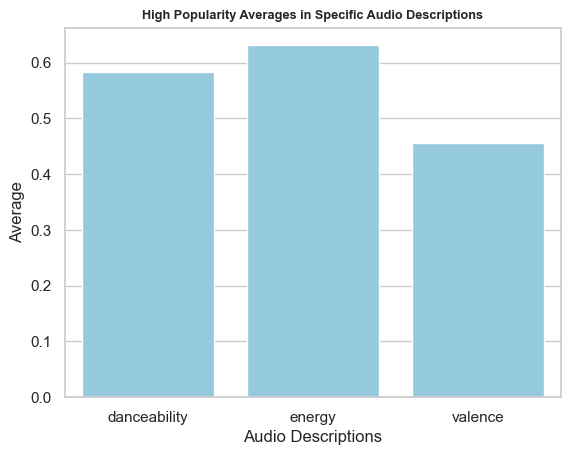

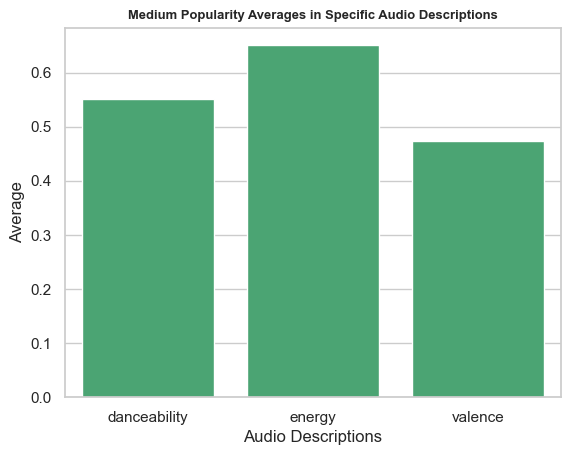

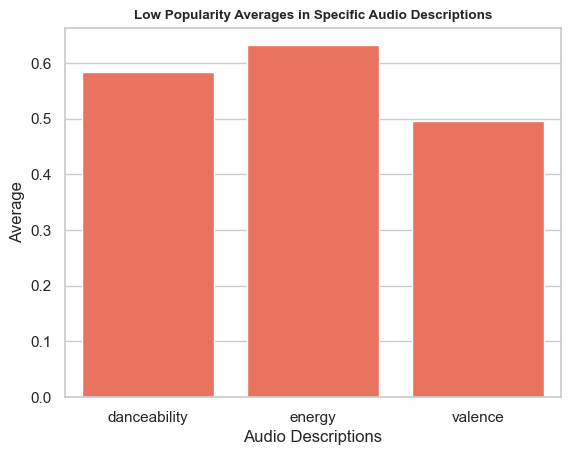

In [99]:
#Graphs each one just like in R but with better view
#barplots for all popularity averages

##plot for high

sns.barplot(data=changeHighDataFrame, x='audioDescriptions', y='average', color='#87CEEB')
plt.title("High Popularity Averages in Specific Audio Descriptions", fontsize=9.2, weight='bold')
plt.xlabel("Audio Descriptions")
plt.ylabel("Average")
plt.show()

##plot for Medium 
sns.barplot(data=changeMediumDataFrame, x='audioDescriptions', y='average', color='#3CB371')
plt.title("Medium Popularity Averages in Specific Audio Descriptions", fontsize=9.4, weight='bold')
plt.xlabel("Audio Descriptions")
plt.ylabel("Average")
plt.show()

##plot for Low 
sns.barplot(data=changeSmallDataFrame, x='audioDescriptions', y='average', color='#FF6347')
plt.title("Low Popularity Averages in Specific Audio Descriptions", fontsize=9.7, weight='bold')
plt.xlabel("Audio Descriptions")
plt.ylabel("Average")
plt.show()



In [55]:
##this combines all rows by binding them through new mutated columns
allAudioChanges = pd.concat([#concatenated all of them to line up so we find similarities
    changeHighDataFrame.assign(popularityLevel="High"),
    changeMediumDataFrame.assign(popularityLevel="Medium"),
    changeSmallDataFrame.assign(popularityLevel="Low")
])

allAudioChanges['popularityLevel'] = pd.Categorical(
    allAudioChanges['popularityLevel'],
    categories=['Low', 'Medium', 'High'],
    ordered=True
)


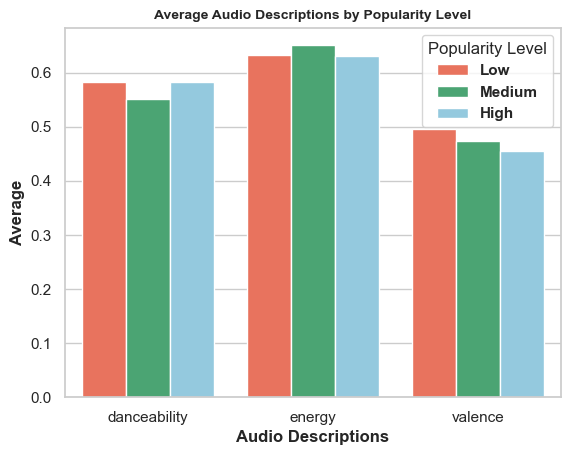

In [100]:
#graph for all omparisons of audio decriptions side by side
sns.barplot(data=allAudioChanges, x='audioDescriptions', y='average', hue='popularityLevel',
            palette={'High': '#87CEEB', 'Medium': '#3CB371', 'Low': '#FF6347'})

plt.title("Average Audio Descriptions by Popularity Level", fontsize=10, weight='bold')
plt.xlabel("Audio Descriptions",weight='bold')
plt.ylabel("Average", weight='bold')
plt.legend(title="Popularity Level", prop={'weight': 'bold'})#has to use prop for title weight to be bold
plt.show()


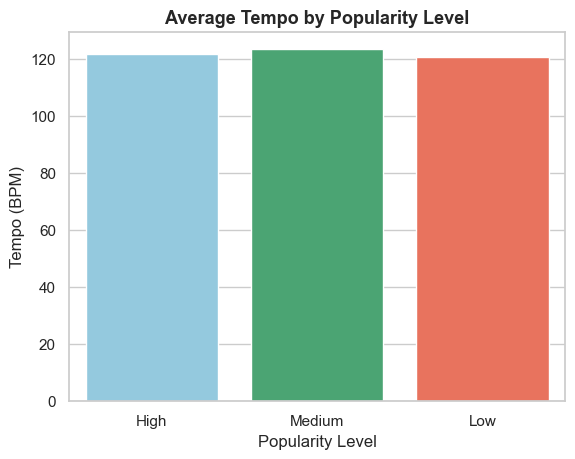

In [102]:
#tempo data frame
seperateTempoDataFrame = pd.DataFrame({
    'popularityLevel': ['High', 'Medium', 'Low'],
    'tempo': [allHighSummary['tempo'], allMediumSummary['tempo'], allLowSummary['tempo']]
})

#dded hue to be the same as the x variable and legend for seaborn update to still stay relevant 
sns.barplot(data=seperateTempoDataFrame, x='popularityLevel', y='tempo', hue='popularityLevel',
            palette={'High': '#87CEEB', 'Medium': '#3CB371', 'Low': '#FF6347'}, legend=False)
#graph fro tempo
plt.title("Average Tempo by Popularity Level", fontsize=13, weight='bold')
plt.xlabel("Popularity Level")
plt.ylabel("Tempo (BPM)")
plt.show()


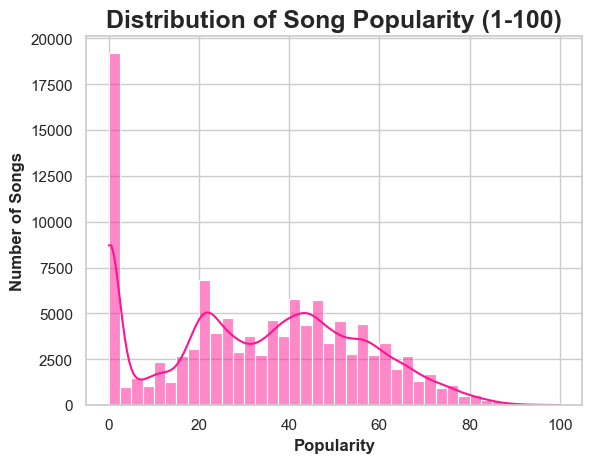

In [75]:
##Distribution graph of popualrity songs 
#kde rememebr adds that density curve 
#30 through 50 bins is good
sns.histplot(spotifyMusicData['popularity'], bins=40, kde=True, color='#FF1493')
plt.title("Distribution of Song Popularity (1-100)", fontsize=18, weight='bold')
plt.xlabel("Popularity", weight='bold')
plt.ylabel("Number of Songs", weight='bold')
plt.show()



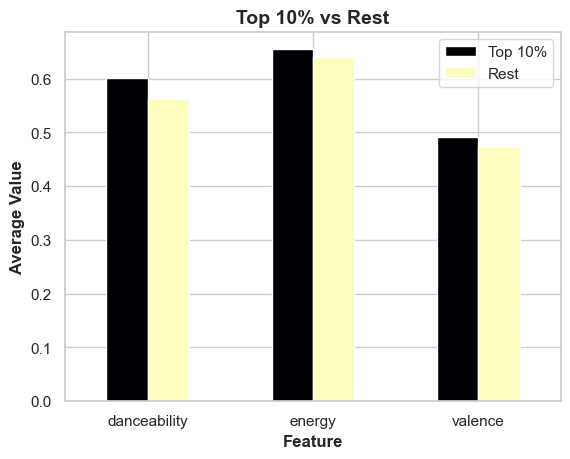

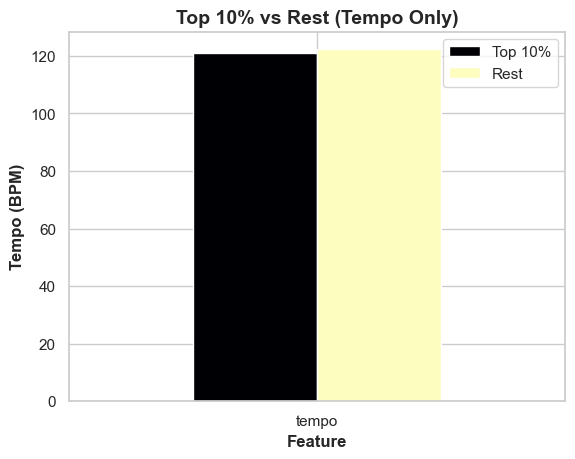

In [98]:
##the tempo had differnt values thats are higher then the other 3 i pciked so i had to seperate the grpahs for visibility
top_vs_rest_subset = top_vs_rest[top_vs_rest['Feature'].isin(['danceability', 'energy', 'valence'])]
top_vs_rest_subset.set_index('Feature').plot(kind='bar', colormap='magma')

#graph comparisons to top 10%
plt.title("Top 10% vs Rest", fontsize=14, weight='bold')
plt.xlabel("Feature", weight='bold')
plt.ylabel("Average Value", weight='bold')
plt.xticks(rotation=0)# need this becuase it was printedting vertically 
plt.show()

#Tempo graph
tempo_only = top_vs_rest[top_vs_rest['Feature'] == 'tempo']
tempo_only.set_index('Feature').plot(kind='bar', colormap='magma')

plt.title("Top 10% vs Rest (Tempo Only)", fontsize=14, weight='bold')
plt.xlabel("Feature", weight='bold')
plt.ylabel("Tempo (BPM)", weight='bold')
plt.xticks(rotation=0)
plt.show()


 Conclusion

- From the popularity distribution graph, we can see that most songs fall between the 
30 to 50 range on Spotify’s popularity scale. This proves that most songs that had a mean of 50 or more that identified as high popualrity is difficult to be popular songs since its hard to reach a song that satifies all type of audiences but defeintly possible and we can also see its that the graph is skewed to the left proving that its hard to have a hit song at times.

-In the grouped analysis by popularity level, songs with higher popularity songs had more danceabality, energy, valence but tempo was a differnt case. While the results werent extreme it defenitly shows something to us. Tempo that was around 120 BPM had the most popularity score.
